In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

***Load Dataset***

In [33]:
file_path = "C:/Users/CVR/Documents/COE Project/15-03-2025/Social_Network_Ads.csv"
df = pd.read_csv(file_path)
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


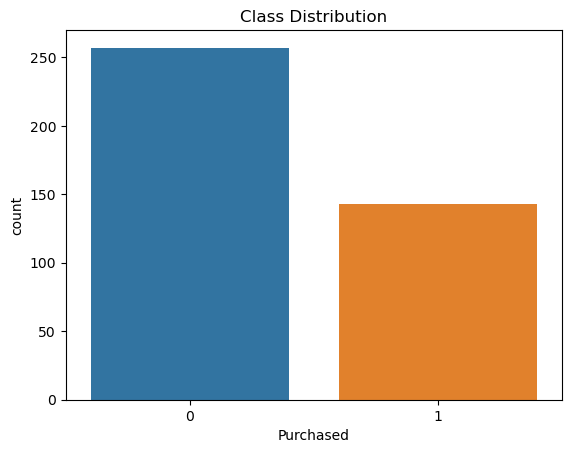

In [34]:
#check for missing values
print(df.isnull().sum())


#Summary statistics
print(df.describe())

#check class distribution
sns.countplot(x=df['Purchased'])
plt.title("Class Distribution")
plt.show()

***Feature Selection and Preprocessing***

In [43]:
#Define independent variables (X) and Target Variable(y)
#X = df.drop("Purchased",axis = 1)
#y = df['Purchased']

#split the dataset into training and testing sets(80-20split)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

In [45]:
classifier = DecisionTreeClassifier(criterion = 'entropy')

In [46]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [47]:
y_pred = classifier.predict(X_test)

Accuracy: 0.84


<Axes: >

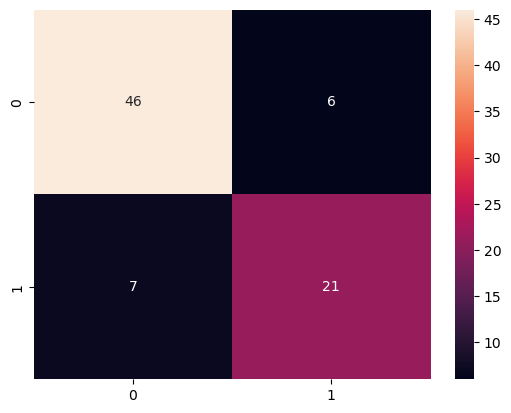

In [48]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)